# Climatology.  
This notebook computes the climatology (monthly means) of surface temperature, salinity, and net primary production for the control run.

In [ ]:
# Import the packages that you want to use
import xarray as xr
import glob as glob
import numpy as np

Point to and load the data

In [3]:
# Specify the path to the data on oahu
# Here, I specify the main "postprocess" path, which ends with the folder "pp"
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' + 'ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/'+
           'pp/ocean_month/ts/monthly/5yr/ocean_month')

filename = rootdir+'.010101-010512.tos.nc'
filename_salinity = rootdir+'.010101-010512.sos.nc'

# The combination of all these defines the path
path = filename
print()

# Load the file using xarray
ds = xr.open_dataset(path)
sos = xr.open_dataset(path_salinity)
print(ds)
# For some memory reasons, we are going to "chunk" the data in the time dimension
ds = ds.chunk({'time':60})
sos = sos.chunk({'time':60})

# Let's also load data on the "grid" - the spatial information about
# how and where the data are located on the world
# These are found in so-called "static" files within the pp subfolders
# and also
#COMMENTING THIS OUT FOR NOW
# gridfilename = '01010101.ocean_'+'static.nc'
# gridpath = rootdir+ppname+'/'+gridfilename
# grid = xr.open_dataset(gridpath)

NameError: name 'path_salinity' is not defined

In [22]:
# Here, we separate all the files into 3 lists: temperature, salinity, and NPP
# Figure out later if sorting is necessary
TSS = sorted(glob.glob(rootdir+'*tos.nc'))
SSS = sorted(glob.glob(rootdir+'*sos.nc'))
NPP = sorted(glob.glob(rootdir+'*MLD_003.nc'))
print(len(rootdir))
print(TSS[0][185:])


185
.010101-010512.tos.nc


0
(60, 576, 720)
(5, 576, 720)
(576, 720)
----
(2, 576, 720)
(576, 720)


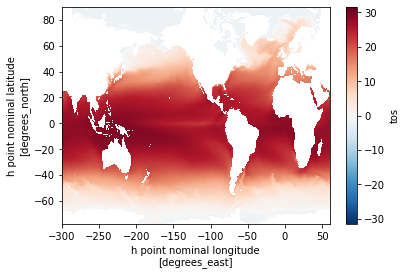

In [5]:
# SCRATCH SPACE FOR FIGURING OUT HOW TO PROCESS DATA
# LEAVE THIS FOR REFERENCE

jan_mean_tos = []
print(len(jan_mean_tos))
for i in range(1):
    path = TSS[i]
    ds = xr.open_dataset(path)
    print(ds['tos'].shape)
    jan = ds['tos'].isel(time=[0,12,24,36,48])
    print(jan.shape)
    print(jan.mean(axis=0).shape)
   # jan.mean(axis=0).plot()
    jan_mean = jan.mean(axis=0) #ateempt to add to 1 xarray
    jan_mean_tos.append(jan.mean(axis=0)) #list attempt
    
    feb = ds['tos'].isel(time=[1,13,25,37,49])
    feb_mean = feb.mean(axis=0)
    jan_mean_tos.append(feb.mean(axis=0))
    jan_total = xr.concat([jan_mean, feb_mean],dim='file') #this works!!!!!
    mar = ds['tos'].isel(time=[2,14,26,38,50])
    apr = ds['tos'].isel(time=[3,15,27,39,51])
    may = ds['tos'].isel(time=[4,16,28,40,52])
    jun = ds['tos'].isel(time=[5,17,29,41,53])
    print('----')
    print(jan_total.shape)
    jan_avg = jan_total.mean(axis=0)
    print(jan_avg.shape)
    jan_avg.plot()



In [39]:
#CHECK THISS!!!!!!
def append_monthly_avg(ds, mon, month_total):
    # Get the 5 maps for the given month from the file and get one mean map
    month = ds['tos'].isel(time=[0+mon,12+mon,24+mon,36+mon,48+mon])
    month_file_mean = month.mean(axis=0)
    month_total = month_total + month_file_mean
    return month_total

def get_monthly_avg(ds, mon):
    month = ds['tos'].isel(time=[0+mon,12+mon,24+mon,36+mon,48+mon])
    month_file_mean = month.mean(axis=0)
    return month_file_mean


33
33
12


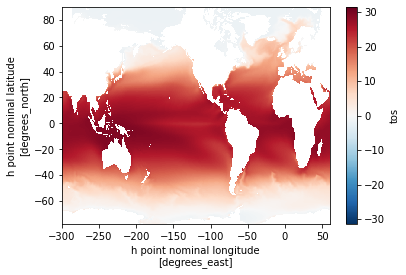

In [40]:
month_totals = []
month_avgs = []
print(len(TSS))
for i in range(len(TSS)):
    path = TSS[i]
    ds = xr.open_dataset(path)
    
    for month in range(12):
        if i==0:
            month_totals.append(get_monthly_avg(ds, month))
        else:
            month_totals[month] = append_monthly_avg(ds, month, month_totals[month])
    
# at the end, compute the average across all 33 files
print(len(TSS))
print(len(month_totals))
for month in range(12):
    month_avgs.append(month_totals[month] / len(TSS))
    
january_tss = month_avgs[0]
january_tss.plot()

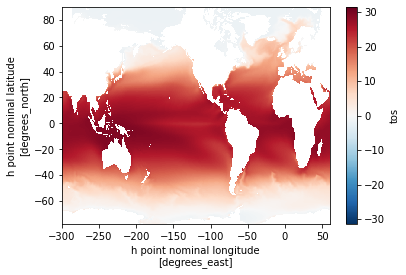

In [41]:
# Go through all files, adding the mean for each month to an xarray
for i in range(len(TSS)):
    path = TSS[i]
    ds = xr.open_dataset(path)
    
    jan = ds['tos'].isel(time=[0,12,24,36,48]) 
    jan_mean = jan.mean(axis=0) #ateempt to add to 1 xarray
    #feb = ds['tos'].isel(time=[1,13,25,37,49])
    #feb_mean = feb.mean(axis=0)
    #jan_total = xr.concat([jan_mean, feb_mean],dim='file') #this works!!!!!
    #mar = ds['tos'].isel(time=[2,14,26,38,50])
    #apr = ds['tos'].isel(time=[3,15,27,39,51])
    #may = ds['tos'].isel(time=[4,16,28,40,52])
    #jun = ds['tos'].isel(time=[5,17,29,41,53])
    if i==0:
        jan_total = jan_mean
        jan_ver2 = jan_mean
    else:
        jan_total = xr.concat([jan_total, jan_mean],dim='file')
        jan_ver2 = jan_ver2 + jan_mean
    
# at the end, compute the average of each month
jan_avg = jan_total.mean(axis=0)
jan_v2_avg = jan_ver2 / len(TSS)
jan_avg.plot()


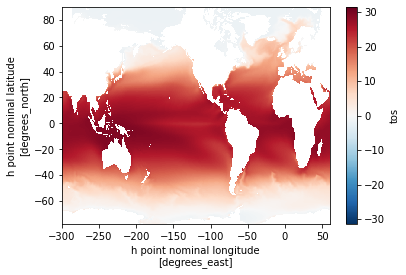

In [42]:
jan_v2_avg.plot()

True


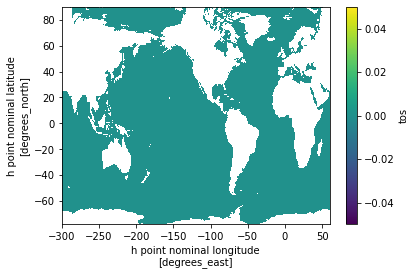

In [43]:
# The next two cells are just checking that version 2 method seems to work
diff = jan_avg - jan_v2_avg
diff.plot()
print(jan_avg.equals(jan_v2_avg))

True


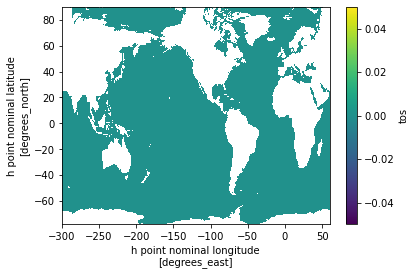

In [44]:
diff2 = january_tss - jan_avg
diff2.plot()
print(jan_avg.equals(january_tss))

In [ ]:
for i in range(len(TSS)):
    path = TSS[i]
    ds = xr.open_dataset(path)
    
    jul = ds['tos'].isel(time=[7,19,31,43,55]) 
    jul_mean = jul.mean(axis=0) #ateempt to add to 1 xarray
    #feb = ds['tos'].isel(time=[1,13,25,37,49])
    #feb_mean = feb.mean(axis=0)
    #jan_total = xr.concat([jan_mean, feb_mean],dim='file') #this works!!!!!
    #mar = ds['tos'].isel(time=[2,14,26,38,50])
    #apr = ds['tos'].isel(time=[3,15,27,39,51])
    #may = ds['tos'].isel(time=[4,16,28,40,52])
    #jun = ds['tos'].isel(time=[5,17,29,41,53])
    if i==0:
        jul_total = jul_mean
    else:
        jul_total = xr.concat([jul_total, jul_mean],dim='file')
    print(jul_total.shape)
jul_avg = jul_total.mean(axis=0)
print(jul_avg.shape)
jul_avg.plot()


#### Some very simple plots
Xarray allows us to make very simple plots, to quickly look at the data.  
Produce a simple plot of the SST on very firs day.

<xarray.DataArray 'tos' (time: 60, yh: 576, xh: 720)>
[24883200 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 0101-01-16 12:00:00 ... 0105-12-16 12:00:00
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature
<xarray.DataArray 'tos' (yh: 576, xh: 720)>
[414720 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
    time     object 0104-06-16 00:00:00
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean

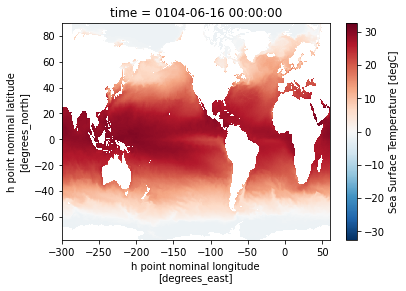

In [76]:
# 'tos' selects the temperature variable from the dataset ds
# .isel(time=0) selects the 0'th (in python indices start at 0) index of the data along the time dimension
ds['tos'].isel(time=41).plot()
print(ds['tos'])
print(ds['tos'].isel(time=41))
# Because there are positive and negative values in the data, xarray automatically uses a diverging colormap

In [36]:
# I can select the time not simply from the index but also from the value itself, using .sel(time='0101-01-01')
# Here, the string '0101-01-01' is a particular format that matches the format of the time coordinates from the netcdf
(ds['tos']).sel(time='0103-11-16').plot()

print(november.shape)

KeyError: '0103-11-16'

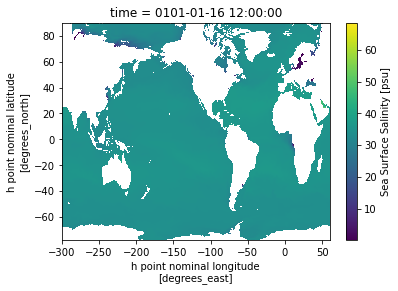

In [10]:
sos['sos'].isel(time=0).plot()

#### More complicated plots
The `.plot()` tool in xarray is wonderful for quick explorations of data, but you may wish to produce something more involved, *e.g.* with a different map projection.  

##### Irregular grids
The data for this model are not located on a "regular" latitude-longitude grid. That is, the latitude and longitude do not just increase monotonically and equally spaced as a function of the position in our data matrix. This leads to some intricacies with plotting - if we want to show a map projection of the data, we can't just plot the matricx, we have to locate each poin with its *actual* latitude and longitude. This actual latitude and longitude location is specified in the grid file, with the variables *geolat* and *geolon*. Some careful steps need to be navigated to do this plotting properly.

##### Packages
For nice plots, you can use matplotlib, in combination with `cartopy`. If you've not yet installed `cartopy`, you can do so in the terminal on oahu (with your project environment activated) by typing `conda install -c conda-forge cartopy`.

In [16]:
# Import the packages that I want
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [15]:
# Specify the projection you want to use
crs = ccrs.PlateCarree()

# Create a figure and axes using matplotlib
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs})

# Specify the longitude and latitude, and the variable that you wish to plot
# Note that here I need to get the latitude and longitude from the grid file
X = ds['xh']
Y = ds['yh']
Z = ds['tos'].sel(time='0103-11-16').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions

# Create a contour plot of SST
im = ax.contourf(X,Y,Z,transform=crs)

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()

# Give your plot a title
ax.set_title('1a. Sea Surface Temperature, January 1950',fontsize=14,loc='left')

# Finally, add a colorbar
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
cbar.set_label('$^\circ\,K$',fontsize=12)

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


URLError: <urlopen error [Errno -2] Name or service not known>

<Figure size 720x720 with 2 Axes>

Now zoom in on the North Atlantic, and explicitly specify which temperature contours to plot...

Text(0.0, 1.0, '1b. Zoom in North Atlantic')

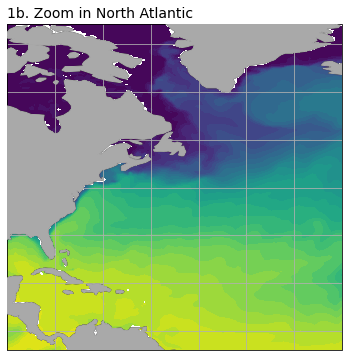

In [12]:
# Specify which contours to plot, by creating an array in numpy, then pass that array to contourf
import numpy as np
clevs = np.arange(-2,30,1)

# Specify the projection you want to use
crs = ccrs.PlateCarree()

# Create a figure and axes using matplotlib
fig,ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':crs})

# Specify the longitude and latitude, and the variable that you wish to plot
X = grid['geolon']
Y = grid['geolat']
Z = ds['tos'].sel(time='0101-01-01').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions

# Create a contour plot of SST
im = ax.contourf(X,Y,Z,clevs,transform=crs)

# Zoom in on the North Atlantic region
ax.set_extent([-90,-20,25,50])

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()

# Cartopy determines the aspect ratio (width vs height) of the plot, based on the .set_extent and the projection.
# If we are determined that we wish the plot to be square (specified by the figsize option in plt.subplots()),
# we can use the following command to allow matplotlib to adjust the extent to ensure that the plot is square.
ax.set_adjustable('datalim')

# Give your plot a title
ax.set_title('1b. Zoom in North Atlantic',fontsize=14,loc='left')

## Time-series data
Visualise the change of global mean SST over time.  
Not all grid points in a model have the same surface area, so when calculating averages, we need to do an area weighting.  

In [13]:
# Calculate the area-weighted mean sea-surface temperature
# This is very easy with xarray, using the .weighted() command

# The area information is located in the grid file
# Take the area-weighted mean, specifying the dimensions (xh and yh) over which to take the mean
tos_mean = ds['tos'].weighted(grid['areacello']).mean(['xh','yh'])

In [19]:
# Plot it
# (note that you may need to install nc-time-axis package in your conda environment to plot with time on the x-axis)
tos_mean.plot()

<xarray.DataArray 'tos' (time: 1825)>
dask.array<truediv, shape=(1825,), dtype=float32, chunksize=(60,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0101-01-01 12:00:00 ... 0105-12-31 12:00:00

Now I will plot annual averages and a seasonal climatology. This is remarkably easy, using xarray's `groupby` function.

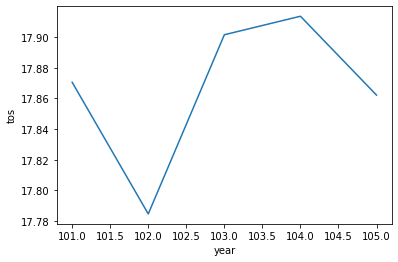

In [10]:
# Calculate the annual mean
tos_mean.groupby('time.year').mean().plot()

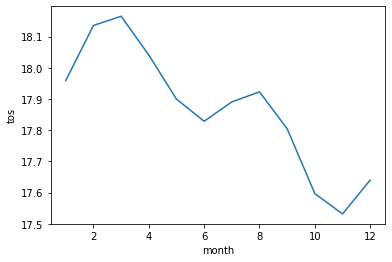

In [11]:
# Calculate the monthly climatology
tos_mean.groupby('time.month').mean().plot()

### Loading longer time-series
Our data are saved in groups of 5 years, hence that is the length of the time-series plotted above. However, we can load and concatenate multiple files all at once, to create, load, and plot longer time-series.  
This is very easy with `xarray`, where all we need to change in our loading procedure above is the `filename`, so that it includes a "wildcard" entry, and use the command `xr.open_mfdataset`, where `mf` stands for "multiple files".

In [12]:
# The wildcard entry * tells python to look for all files that match that pattern,
# where the * can be replaced by anything, of any length
# Here, I am going to load all data in the first century
filename = ppname+'.01*0101-01*1231.tos.nc'
# Respecify the path (everything else is the same here)
path = rootdir+ppname+localdir+filename
# Load the data
ds = xr.open_mfdataset(path)
# Chunk again
ds = ds.chunk({'time':60})

In [13]:
# Now do the area-weighted average
tos_mean = ds['tos'].weighted(grid['areacello']).mean(['xh','yh'])

In [14]:
# Now plot
# Because this calculation will take a while, it can be useful to ensure that it's still chugging away
# For this we can use a convenient "progress bar"
from dask.diagnostics import ProgressBar

[########################################] | 100% Completed |  6min 20.1s


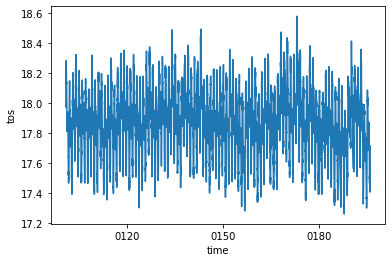

In [15]:
# Because we are going to make a number of further plots, 
# it can be useful to load the data into memory with `.compute`
# before plotting
with ProgressBar():
    tos_mean = tos_mean.compute()
tos_mean.plot()

### A more complicated plot
Using `subplots` in `matplotlib`, we can plot all three of these as panels on the same figure.

Text(0.5, 0, 'Month')

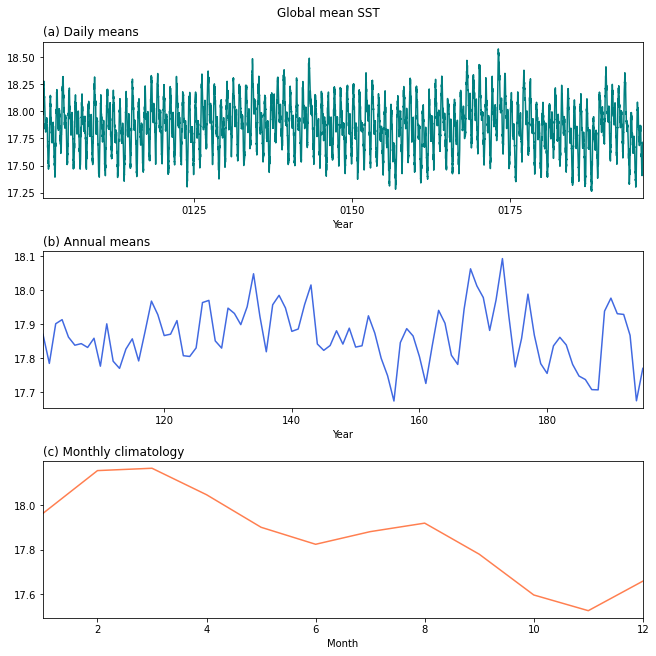

In [16]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(9,9),nrows=3,constrained_layout=True)
fig.suptitle('Global mean SST') # Specify a figure title
# Monthly means
ax0.plot(tos_mean['time'],tos_mean,color='teal')
ax0.set_title('(a) Daily means',loc='left')
ax0.autoscale(enable=True,axis='x',tight=True) # Make x-axis "tight"
ax0.set_xlabel('Year')
# Annual means
#   * use np.unique() to pick out an array of years
ax1.plot(np.unique(tos_mean['time.year']),tos_mean.groupby('time.year').mean(),color='royalblue')
ax1.set_title('(b) Annual means',loc='left')
ax1.autoscale(enable=True,axis='x',tight=True) # Make x-axis "tight"
ax1.set_xlabel('Year')
# Monthly climatology
#   * use np.unique() to pick out an array of months
ax2.plot(np.unique(tos_mean['time.month']),tos_mean.groupby('time.month').mean(),color='coral')
ax2.set_title('(c) Monthly climatology',loc='left')
ax2.autoscale(enable=True,axis='x',tight=True) # Make x-axis "tight"
ax2.set_xlabel('Month')

## Making your own plots
Here are a few ideas for plots that you could try to make using the examples above as a starting point:
* Spatial maps of temperature for different
    * points in time (monthly, or longer term averages)
    * emissions
* Spatial maps of temperature *change* between two different time periods
    * global maps
    * regional maps
* Time-series data for different regions (e.g. Atlantic basin, Southern Ocean)
    * monthly mean and annual averages displayed on the same plot?
* Change in the monthly climatology over time